In [4]:
# Gym stuff
import gym
import gym_anytrading
# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from trader import trader_agent
import cryptomanager as cm
test = trader_agent()

1


In [5]:
df = cm.historical_data_df(days_delta=0)
print(df.dtypes)
df

date     datetime64[ns, UTC]
Open                 float64
High                 float64
Low                  float64
Close                float64
dtype: object


,date,Open,High,Low,Close
0,2022-11-04 05:00:00+00:00,20326.0,20331.0,20326.0,20331.0
1,2022-11-04 05:01:00+00:00,20331.0,20331.0,20331.0,20331.0
2,2022-11-04 05:02:00+00:00,20331.0,20331.0,20331.0,20331.0
3,2022-11-04 05:03:00+00:00,20330.0,20331.0,20330.0,20331.0
4,2022-11-04 05:04:00+00:00,20330.0,20330.0,20330.0,20330.0
...,...,...,...,...,...
1251,2022-11-05 02:56:00+00:00,21364.0,21383.0,21364.0,21382.0
1252,2022-11-05 02:57:00+00:00,21385.0,21385.0,21383.0,21383.0
1253,2022-11-05 02:58:00+00:00,21383.0,21383.0,21377.0,21377.0
1254,2022-11-05 02:59:00+00:00,21378.0,21386.0,21378.0,21386.0


In [6]:
# df = pd.read_csv("data/gmedata.csv")
env = gym.make('forex-v0', df=df, frame_bound=(5,len(df)), window_size=5)
df

,date,Open,High,Low,Close
0,2022-11-04 05:00:00+00:00,20326.0,20331.0,20326.0,20331.0
1,2022-11-04 05:01:00+00:00,20331.0,20331.0,20331.0,20331.0
2,2022-11-04 05:02:00+00:00,20331.0,20331.0,20331.0,20331.0
3,2022-11-04 05:03:00+00:00,20330.0,20331.0,20330.0,20331.0
4,2022-11-04 05:04:00+00:00,20330.0,20330.0,20330.0,20330.0
...,...,...,...,...,...
1251,2022-11-05 02:56:00+00:00,21364.0,21383.0,21364.0,21382.0
1252,2022-11-05 02:57:00+00:00,21385.0,21385.0,21383.0,21383.0
1253,2022-11-05 02:58:00+00:00,21383.0,21383.0,21377.0,21377.0
1254,2022-11-05 02:59:00+00:00,21378.0,21386.0,21378.0,21386.0


info {'total_reward': 5460000.0, 'total_profit': 0.987824765511809, 'position': 0}


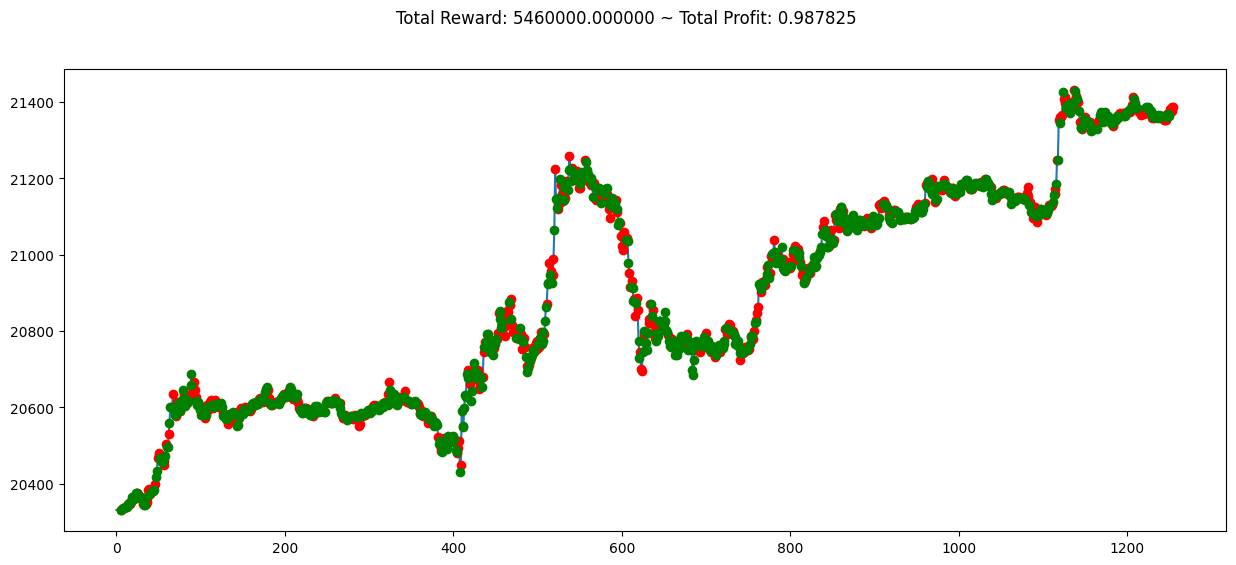

In [7]:
# Examining the model

state = env.reset()
while True: 
    # add a bit of randomness
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [8]:
!pip install finta

In [9]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [10]:
# df['OBV'] = TA.OBV(df)
df['EMA'] = TA.EMA(df, 200)
df['RSI'] = TA.RSI(df)
df.fillna(0, inplace=True)
df = df.join(TA.MACD(df))
df

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2022-11-04 05:00:00+00:00,20326.0,20331.0,20326.0,20331.0,20331.000000,0.000000,0.000000,0.000000
1,2022-11-04 05:01:00+00:00,20331.0,20331.0,20331.0,20331.0,20331.000000,0.000000,0.000000,0.000000
2,2022-11-04 05:02:00+00:00,20331.0,20331.0,20331.0,20331.0,20331.000000,0.000000,0.000000,0.000000
3,2022-11-04 05:03:00+00:00,20330.0,20331.0,20330.0,20331.0,20331.000000,0.000000,0.000000,0.000000
4,2022-11-04 05:04:00+00:00,20330.0,20330.0,20330.0,20330.0,20330.795980,0.000000,-0.039792,-0.011837
...,...,...,...,...,...,...,...,...,...
1251,2022-11-05 02:56:00+00:00,21364.0,21383.0,21364.0,21382.0,21304.631206,61.097599,-0.446032,-2.833182
1252,2022-11-05 02:57:00+00:00,21385.0,21385.0,21383.0,21383.0,21305.410998,61.629321,0.988027,-2.068941
1253,2022-11-05 02:58:00+00:00,21383.0,21383.0,21377.0,21377.0,21306.123329,56.628094,1.621686,-1.330815
1254,2022-11-05 02:59:00+00:00,21378.0,21386.0,21378.0,21386.0,21306.918125,61.654725,2.817610,-0.501130


In [11]:
df.head(15)

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2022-11-04 05:00:00+00:00,20326.0,20331.0,20326.0,20331.0,20331.000000,0.000000,0.000000,0.000000
1,2022-11-04 05:01:00+00:00,20331.0,20331.0,20331.0,20331.0,20331.000000,0.000000,0.000000,0.000000
2,2022-11-04 05:02:00+00:00,20331.0,20331.0,20331.0,20331.0,20331.000000,0.000000,0.000000,0.000000
3,2022-11-04 05:03:00+00:00,20330.0,20331.0,20330.0,20331.0,20331.000000,0.000000,0.000000,0.000000
4,2022-11-04 05:04:00+00:00,20330.0,20330.0,20330.0,20330.0,20330.795980,0.000000,-0.039792,-0.011837
5,2022-11-04 05:05:00+00:00,20330.0,20330.0,20330.0,20330.0,20330.659978,0.000000,-0.062965,-0.025696
6,2022-11-04 05:06:00+00:00,20331.0,20331.0,20331.0,20331.0,20330.710022,53.698630,-0.031439,-0.027149
7,2022-11-04 05:07:00+00:00,20330.0,20334.0,20330.0,20334.0,20331.135806,83.070047,0.132884,0.011310
8,2022-11-04 05:08:00+00:00,20334.0,20336.0,20334.0,20336.0,20331.698142,88.367755,0.343881,0.088135
9,2022-11-04 05:09:00+00:00,20337.0,20337.0,20337.0,20337.0,20332.252502,90.045105,0.540062,0.189393


In [12]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low','EMA',"MACD","SIGNAL", 'RSI']].to_numpy()[start:end]
    return prices, signal_features

In [13]:

class Cypto_Env(StocksEnv):
    _process_data = add_signals
    
env2 = Cypto_Env(df=df, window_size=12, frame_bound=(12,len(df)))

In [14]:
env2.signal_features

array([[ 2.03260000e+04,  2.03310000e+04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 2.03310000e+04,  2.03310000e+04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 2.03310000e+04,  2.03310000e+04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.13770000e+04,  2.13061233e+04,  1.62168578e+00,
        -1.33081528e+00,  5.66280944e+01],
       [ 2.13780000e+04,  2.13069181e+04,  2.81760991e+00,
        -5.01130241e-01,  6.16547250e+01],
       [ 2.13880000e+04,  2.13077249e+04,  3.88202216e+00,
         3.75500239e-01,  6.26895598e+01]])

In [15]:
df.head()

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2022-11-04 05:00:00+00:00,20326.0,20331.0,20326.0,20331.0,20331.00000,0.0,0.000000,0.000000
1,2022-11-04 05:01:00+00:00,20331.0,20331.0,20331.0,20331.0,20331.00000,0.0,0.000000,0.000000
2,2022-11-04 05:02:00+00:00,20331.0,20331.0,20331.0,20331.0,20331.00000,0.0,0.000000,0.000000
3,2022-11-04 05:03:00+00:00,20330.0,20331.0,20330.0,20331.0,20331.00000,0.0,0.000000,0.000000
4,2022-11-04 05:04:00+00:00,20330.0,20330.0,20330.0,20330.0,20330.79598,0.0,-0.039792,-0.011837


In [16]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [17]:
from config import LOG_PATH, MODEL_PATH
from datetime import datetime
import os
 
model = A2C('MlpPolicy', env, verbose=1, tensorboard_log=LOG_PATH) 
model.device = "cuda"
name = str(datetime.now().strftime("%Y-%d-%m-%H-%M") )
print(name)
episodes = 50
step_count = 100000
# for i in range (episodes):
#     model.learn(total_timesteps=step_count, tb_log_name=f"A2C - {name}")
#     model.save(f"{os.path.join(MODEL_PATH , name)} -{i + 1}.zip")

Using cpu device
2022-04-11-23-01


In [18]:
# plt.figure(figsize=(15,6))
# plt.cla()
# env.render_all()
# plt.show()

In [19]:
from gym_anytrading.envs import StocksEnv, ForexEnv
from finta import TA# df['OBV'] = TA.OBV(df)
import time

def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close','EMA',"MACD","SIGNAL", 'RSI']].to_numpy()[start:end]
    return prices, signal_features


from gym import spaces
class Cypto_Env(StocksEnv):
    _process_data = add_signals
    # StocksEnv.action_space = spaces.Discrete(len(Actions))


window_size = 5
lower_bound = len(df) - window_size
upper_bound = len(df)
env = gym.make('stocks-v0', df=df, frame_bound=(lower_bound,upper_bound), window_size=window_size)
test_env = Cypto_Env(df=df, window_size=window_size, frame_bound=(lower_bound,upper_bound))

# model = A2C.load("data\model\1667573580.7123804.zip", env=test_env)


In [20]:

test_env = Cypto_Env(df=df, window_size=window_size, frame_bound=(lower_bound,upper_bound))
env_maker = lambda: test_env
env = DummyVecEnv([env_maker])
model = A2C('MlpPolicy', env, verbose=1, tensorboard_log=LOG_PATH, device="cuda") 
cur_time = str(time.time())
# model = model.learn(total_timesteps=step_count, tb_log_name= f"A2C-{cur_time}")
# model = A2C.load("data/model/latest.zip", env=test_env)

Using cpu device


In [21]:
# from datetime import datetime, timedelta, time
# cur_time = datetime.now().minute
# wait_time = 2
# last_time = 0


# while True:
#     check_time = 
#     cur_time = datetime.now().minute
#     if cur_time > last_time:
#         last_time = cur_time + wait_time - 1
#         check_time = datetime.now() + timedelta(minutes = wait_time) 
#         print("some shit")
#     else:
#         print("Time til trade: ", check_time - datetime.now() )



In [22]:
def return_obs(df):
    start = len(df) - window_size
    end = len(df)
    signal_features = df.loc[:, ['Low','EMA',"MACD","SIGNAL", 'RSI']].to_numpy()[start:end]
    return signal_features

    
next_df = cm.historical_data_df()
next_df = next_df.loc[-100:]
next_df['EMA'] = TA.EMA(next_df, 200)
next_df['RSI'] = TA.RSI(next_df)
next_df.fillna(0, inplace=True)
next_df = next_df.join(TA.MACD(next_df))
test_env.df = next_df

print(next_df[-window_size:])
print(return_obs(next_df))


                          date     Open     High      Low    Close  \
1251 2022-11-05 02:56:00+00:00  21364.0  21383.0  21364.0  21382.0   
1252 2022-11-05 02:57:00+00:00  21385.0  21385.0  21383.0  21383.0   
1253 2022-11-05 02:58:00+00:00  21383.0  21383.0  21377.0  21377.0   
1254 2022-11-05 02:59:00+00:00  21378.0  21386.0  21378.0  21386.0   
1255 2022-11-05 03:00:00+00:00  21389.0  21395.0  21388.0  21388.0   

               EMA        RSI      MACD    SIGNAL  
1251  21304.631206  61.097599 -0.446032 -2.833182  
1252  21305.410998  61.629321  0.988027 -2.068941  
1253  21306.123329  56.628094  1.621686 -1.330815  
1254  21306.918125  61.654725  2.817610 -0.501130  
1255  21307.724912  62.689560  3.882022  0.375500  
[[ 2.13640000e+04  2.13046312e+04 -4.46032012e-01 -2.83318247e+00
   6.10975988e+01]
 [ 2.13830000e+04  2.13054110e+04  9.88027177e-01 -2.06894054e+00
   6.16293213e+01]
 [ 2.13770000e+04  2.13061233e+04  1.62168578e+00 -1.33081528e+00
   5.66280944e+01]
 [ 2.1378000